In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Donor Data Analysis Overview: SamsFans
This analysis explores donation trends for SamsFans to better understand donor behavior and revenue patterns. Using Python libraries such as `pandas`, `seaborn`, and `matplotlib`, we analyzed donation data to answer key questions.

* When does SamsFans receive the most in donations?
* When do they receive the least?
* How much did SamsFans receive each month in a given year?
* Which month has brought in the most revenue? Which year?
* Who donates the most?
* Are there campaigns/appeals that garner more revenue than others?


## Cleaning and Refining the Dataset
Before analyzing the data, we used OpenRefine to clean and standardize key columns. In the __`Date`__ column, we removed the timestamp portion to keep only the `YYYY-MM-DD` format since the specific time of day wasn't relevant to our analysis. In the __`Revenue Amount`__ column, donation values were originally stored as strings with dollar signs (e.g. `"$20.76"`). Using OpenRefine, we stripped the `$` symbol and converted to numerical values, that way we can create accurate calculations and visualizings using the revenue amount.

In [31]:
# Load our new dataset and parse the 'Date' column as datetime objects
df = pd.read_csv("SamsFansOR.csv", parse_dates=['Date'])

# Explore dataset
df.head()

,Account Number,Date,Revenue Amount (USD),Type,Fund,Campaign,Appeal,Primary City,Primary State,Primary ZIP Code
0,8231,2025-02-18,20.76,Recurring Donation Payment,Unrestricted,NaN,NaN,Columbus,OH,43214-4014
1,2139,2025-02-17,78.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Galena,OH,43021
2,1566,2025-02-15,52.30,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Darien,CT,06820-3204
3,10382,2025-02-15,21.11,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,NaN,Columbus,OH,43214
4,9739,2025-02-15,24.23,Recurring Donation Payment,Unrestricted,Sam's Fans 2024,BTJ Website,Dublin,OH,43017


## When does SamsFans receive the most in donations? When do they receive the least?

To determine when SamsFans receives the most and least in donations, we can group the data by month to calculate the total revenue garnered for each across all years. This analysis will show us which months have historically brought in the highest and lowest totol donations.

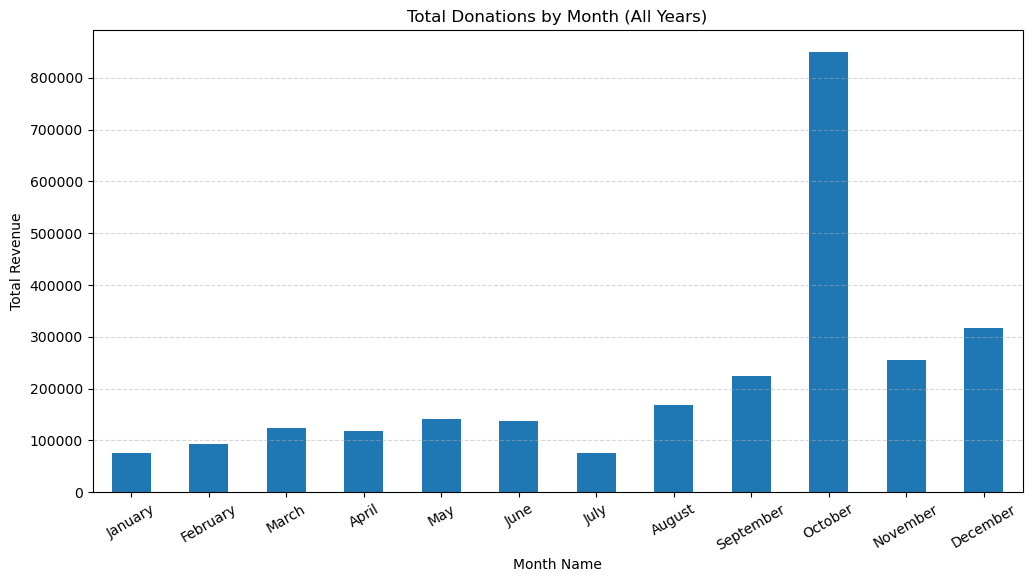

In [32]:
# Extract the numeric month (1-12) from the 'Date' column. Put these extracted values into a new column called 'Month Num'
df['Month Num'] = df['Date'].dt.month

# Extract the full month name from the 'Date' column. Put these extracted values into a new column called "Month Name"
df['Month Name'] = df['Date'].dt.strftime('%B')

# Group the data by month name. For each month, sum up the amount of donations received in that month (lifetime)
month_trends = df.groupby('Month Name')['Revenue Amount (USD)'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Visualize data in bar chart
month_trends.plot(kind='bar', figsize=(12,6), title='Total Donations by Month (All Years)', ylabel='Total Revenue')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

__What this tells us:__ This visualization shows us that SamsFans receives the most in donations during the months of September through December. Historically, they seem to garner the most revenue during the month of October.

## Who donates most frequently? Who  donates the most money?
To observe SamsFans' top donors, both in terms of frequency and the amount of money they've donated, we will use RFM segmentation.
#### RFM Segmentation

We calculate:
- Recency: Days since last donation
- Frequency: Number of donations
- Monetary: Total donation amount


In [33]:
# Recency = snapshot_date - last donation date
# Make 'snapshot_date' one day after the latest transaction, so no one has a recency of 0
snapshot_date = df['Date'].max() + pd.Timedelta(days=1)

# Create an RFM table by grouping Account Number
rfm = df.groupby('Account Number').agg({
    'Date': lambda x: (snapshot_date - x.max()).days, # diff between snapshot date and latest date per account num
    'Account Number': 'count', # number of transactions per account
    'Revenue Amount (USD)': 'sum' # total revenue per account
}).rename(columns={'Date': 'Recency', 'Account Number': 'Frequency', 'Revenue Amount (USD)': 'Monetary'})

# Sort from most frequent donors to least
rfm_sorted_freq = rfm.sort_values(by=['Frequency'], ascending=False)

# Show the 10 most frequent donors
rfm_sorted_freq.head(10)

,Recency,Frequency,Monetary
Account Number,,,
2544,18,155,11543.44
752,7,142,13313.00
61,14,126,3815.90
8001,18,105,4208.46
32,8,101,26597.78
866,11,97,15771.04
5,18,96,9865.07
163,30,94,3574.63
1231,7,94,1510.00


In [34]:
# Show the 10 donors who have donated the most money
rfm_sorted_monetary = rfm.sort_values(by=['Monetary'], ascending=False)
rfm_sorted_monetary.head(10)

,Recency,Frequency,Monetary
Account Number,,,
10724,55,2,115000.00
9755,126,4,55000.00
1533,111,51,52237.61
552,107,23,47088.88
2047,117,24,45084.48
9184,126,5,42500.00
8090,93,6,38485.00
1041,364,16,38250.00
2558,118,10,38231.75


__What this tells us:__ The following donors tend to donate consistently- Account Number 2544, 752, 61, 8001, and 32. These are the donors who have donated the most money to SamsFans- Account Number 10724, 9755, and 1533.

## How much has SamsFans received in donations each year?

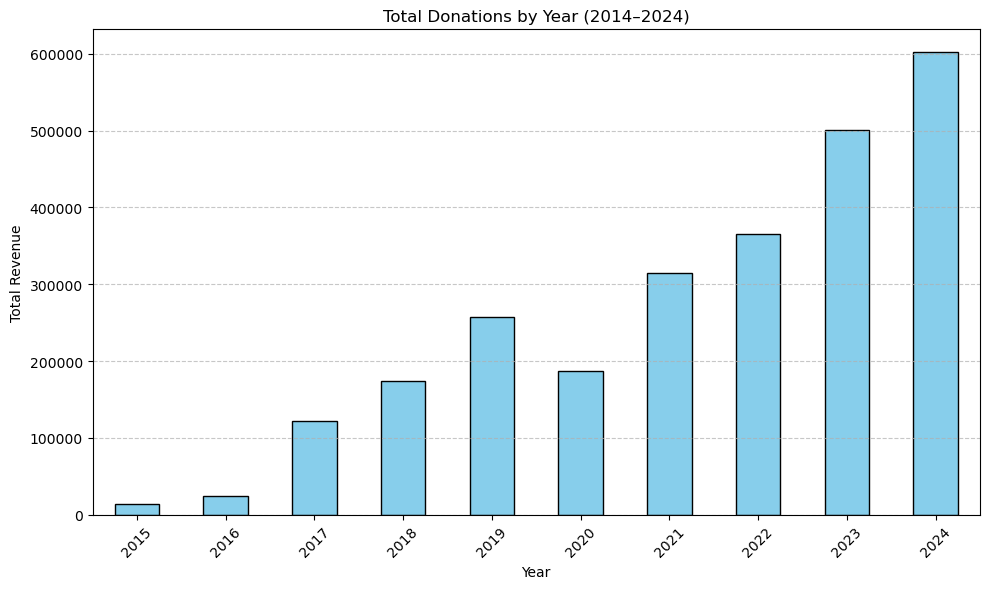

In [35]:
# Make sure 'Date' is datetime and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Filter for years 2014 to 2024
filtered_df = df[(df['Year'] >= 2014) & (df['Year'] <= 2024)]

# Group by year and sum donation revenue
yearly_totals = filtered_df.groupby('Year')['Revenue Amount (USD)'].sum()

# Plot the results
yearly_totals.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black',
                   title='Total Donations by Year (2014–2024)', ylabel='Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


__What this tells us:__ SamsFans' growth can be illustrated by this graph. As the organization as grown, they have become much more successfull in receiving donations. The amount of revenue they have garned in donations is linearly increasing over the years. Since SamsFans gained the most revenue in the years 2023 and 2024, we can focus on those and try to get a better understanding of what they did (in terms of campaigns and events) in order to increase donations.

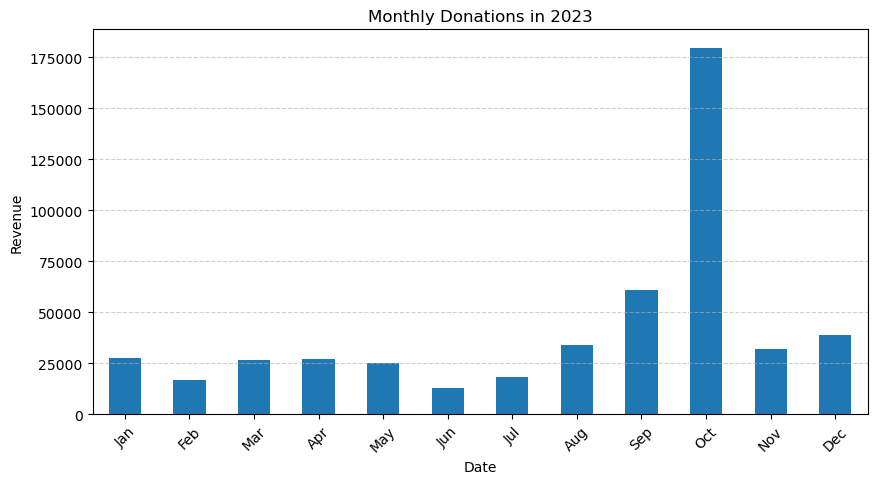

In [36]:
# Focus on 2023
df_2023 = df[df['Year'] == 2023]

# Sum revenue by month
monthly_2023 = df_2023.groupby(df_2023['Date'].dt.month)['Revenue Amount (USD)'].sum()

# Plot
monthly_2023.plot(kind='bar', figsize=(10, 5), title='Monthly Donations in 2023', ylabel='Revenue')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

__What this tells us:__ As seen in the earlier graph, SamsFans receives the most in  donations during the months of September, October, November, and December. In 2023, they received the most in donations during September and October. 

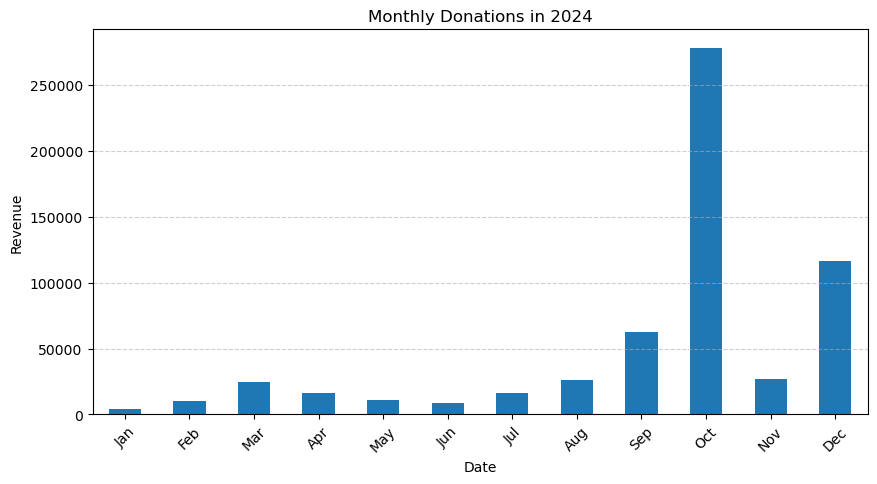

In [37]:
# Focus on 2024
df_2024 = df[df['Year'] == 2024]

# Sum revenue by month
monthly_2024 = df_2024.groupby(df_2024['Date'].dt.month)['Revenue Amount (USD)'].sum()

# Plot
monthly_2024.plot(kind='bar', figsize=(10, 5), title='Monthly Donations in 2024', ylabel='Revenue')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

__What this tells us:__ Just like in 2023, SamsFans received the most donations in September and October of 2024. However, they raised more in December 2024 than in December 2023. On the other hand, from January to August, donations were lower in 2024 compared to the same period in 2023. To understand why, we could look at the fundraising campaigns and events SamsFans held during these months in both years.

## Top SamFans events in 2023 and 2024
Now let's observe the fundraising events SamsFans have hosted in 2023 and 2024. We want to analyze which events have garnered the most revenue in donations.

In [38]:
# Parse Date, Year, Month
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter for Jan–Aug 2023 and 2024
jan_aug = df[(df['Year'].isin([2023, 2024])) & (df['Month'] <= 8)]

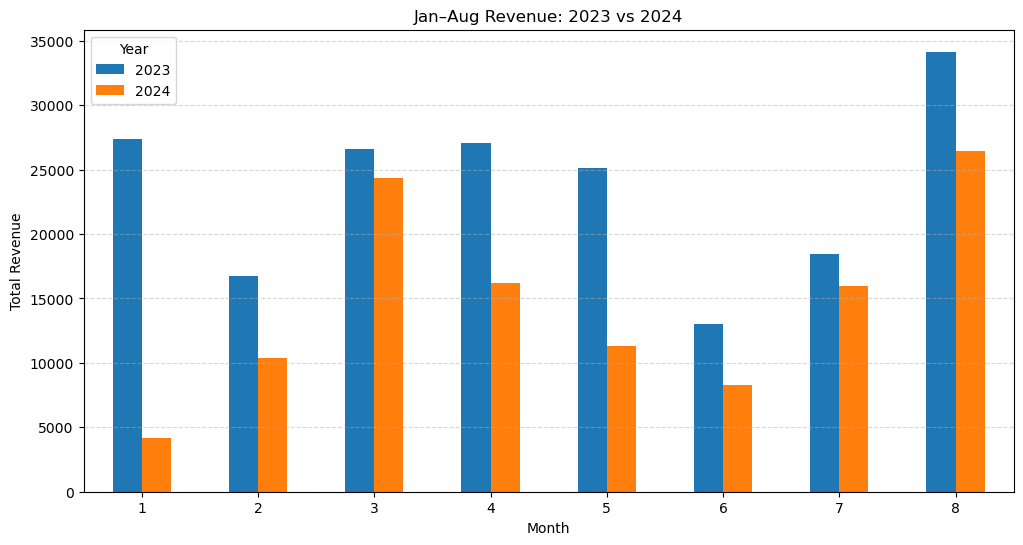

In [39]:
# Plot
monthly_compare = jan_aug.groupby(['Year', 'Month'])['Revenue Amount (USD)'].sum().unstack(level=0)
monthly_compare.plot(kind='bar', figsize=(12,6), title='Jan–Aug Revenue: 2023 vs 2024')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

__What this tells us:__ This visualization compares the total revenue received from January to August of 2023 and 2024. It can be observed that in 2023, SamsFans generally garnered more revenue in donations.

In [40]:
appeals_2023 = jan_aug[jan_aug['Year'] == 2023]['Appeal'].value_counts()
appeals_2024 = jan_aug[jan_aug['Year'] == 2024]['Appeal'].value_counts()
appeals_2023

Appeal
2023 Mat Kearney Concert                                232
BTJ Website                                             121
Audrey and Sam Run Boston                                97
Donation Form Ask                                        71
2023 Color Me Happy                                      69
No Ordinary Night with the Ordinary Boys and Friends     46
2023 Sam's Fans 5K                                       20
2023 THREAD of Hope: BLOOM                               19
2022 Year End Fundraising                                 3
2022 A THREAD of Hope                                     1
Name: count, dtype: int64

__What this tells us:__ This shows us the top appeals from January to August 2023. That is, which events in 2023 from January to August received the most number of donations.

In [41]:
appeals_2024

Appeal
BTJ Website                    112
Donation Form Ask               24
2024 Pine Island .5K            24
2024 Sam's Fans 5K              18
2024 TOH                        10
2023 Year End Giving Appeal      6
Charity Happy Hour               4
Name: count, dtype: int64

__What this tells us:__ This shows us the top appeals from January to August 2024. That is, which events in 2024 from January to August received the most number of donations.

In [42]:
jan_aug.groupby('Year')['Revenue Amount (USD)'].agg(['sum', 'count'])

,sum,count
Year,,
2023,188614.24,829
2024,117207.52,526


__What this tells us:__ We can also take a look at the number of donations received in 2023 and 2024. In 2023, SamsFans received 303 more donations than in 2024, which could possibly explain the difference in the revenue amount between the two years. 

## Top Campaigns and Appeals by Revenue

Another area we can examine for possible insights are campaigns and appeals. We can make observations on which campaigns and appeals garnered the most revenue in donations. Perhaps there are some appeals/campaigns that attract more donors than others.

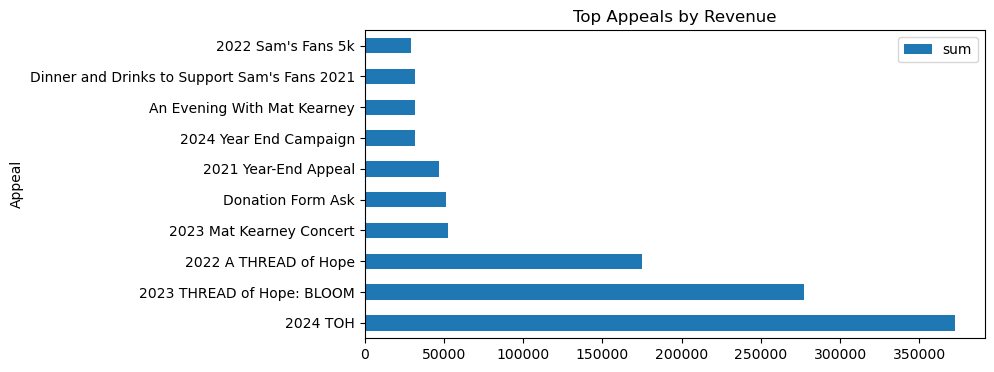

In [43]:
appeals = df.groupby('Appeal')['Revenue Amount (USD)'].agg(['sum']).sort_values(by='sum', ascending=False).head(10)
appeals.plot(kind='barh', title='Top Appeals by Revenue', figsize=(8, 4))
plt.show()

__What this tells us:__ This visualization shows which fundraising appeals brought in the most revenue for SamsFans. This can help us quickly identify which appeals were most successful financially, and which appeals might be worth learning from or repeating. 

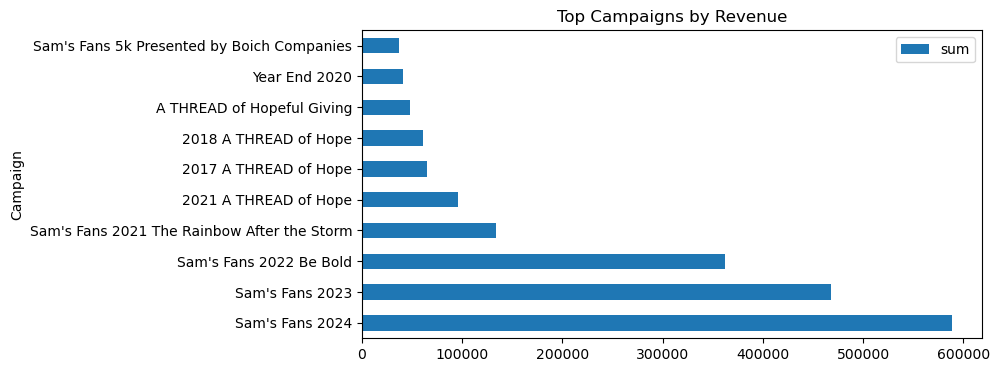

In [44]:
campaigns = df.groupby('Campaign')['Revenue Amount (USD)'].agg(['sum']).sort_values(by='sum', ascending=False).head(10)

campaigns.plot(kind='barh', title='Top Campaigns by Revenue', figsize=(8, 4))
plt.show()

__What this tells us:__ This visualization shows which fundraising campaigns brought in the most revenue for SamsFans. This can help us quickly identify which campaigns were most successful financially, and which campaigns might be worth learning from or repeating. 

## Donations by ZIP Code / State

Lastly, we can take a look at where SamsFans' donors are from. That way, SamsFans can try to focus on these areas in order to keep donors.

In [45]:
# Aggregate revenue by ZIP code
geo = df.groupby('Primary ZIP Code')['Revenue Amount (USD)'].sum().reset_index()

# Get unique city/state info for each ZIP code
zip_info = df[['Primary ZIP Code', 'Primary City', 'Primary State']].drop_duplicates(subset='Primary ZIP Code')

# Merge both
geo = geo.merge(zip_info, on='Primary ZIP Code', how='left')

# Sort by revenue
geo = geo.sort_values(by='Revenue Amount (USD)', ascending=False)

# View top results
geo.head()

,Primary ZIP Code,Revenue Amount (USD),Primary City,Primary State
705,43220,244166.47,Columbus,OH
789,43221,231541.25,Columbus,OH
689,43215,208885.81,Columbus,OH
183,33956,107375.24,St. James City,FL
497,43085,81171.70,WORTHINGTON,OH


__What this tells us:__ This shows us the top 5 ZIP Codes (along with their city and state) who have donated the most amount of money to SamsFans. It can be observed that 4/5 of these ZIP Codes are in Ohio, with 3/5 of them being in Columbus. This makes sense, since SamsFans mainly based in the Columbus, OH area. SamsFans should continue to target local donors by hosting events and fundraising campaigns in Columbus.

## Notable Observations

__October Donations Peak__: Historically, SamsFans receives the highest amount of donations in October. This aligns with their annual fundraising event, A Thread of Hope, which is hosted each October by THREAD, a local fashion boutique in the Columbus, OH area. The event features live music, food, a live and silent auction with unique items, and a fashion show by THREAD. It draws strong community support and consistently generates the most revenue and donor participation.

__Frequent vs. High-Value Donors__:
- Five donors stand out for their frequent contributions - each has donated over 100 times.
- Four separate donors have contributed large individual sums.
- Notably, those who donate most frequently are not the same as those who donate the most money overall.

__Yearly Growth in Revenue__: SamsFans' total donation revenue has grown steadily each year, with the exception of 2020, likely due to the COVID-19 pandemic. 2024 was the highest revenue year to date.

__Comparing 2023 vs 2024__:
- While 2024 brought in more total donation revenue than 2023, the monthly donation patterns differ.
- From January to August, 2023 actually saw higher donation revenue than the same period in 2024.

__Top Fundraising Appeals__:
- 2023: Mat Kearney Convert, BTJ Website, Audrey and Sam Boston Marathon Fundraiser, Color Me Happy, No Ordinary Night with the Ordinary Boys and Friends

- 2024: BTJ Website, Pine Island 5K, SamsFans 5k, A Thread of Hope

__Donation Volume vs. Value__: SamsFans received more individual donations in 2023, but more total donation dollars in 2024.

__Top Donor Region__: Most donations come from individuals located in the Columbus, Ohio Area.

__Most Successful Events__: The highest revenue-generating events include the A Thread of Hope annual event, various 5K runs, and collaborations with Mat Kearney.

## Key Conclusions

__Event-Based Engagement Drives Major Revenue__
- A Thread of Hope is a cornerstone of engagement and revenue. Its recurring success suggests that in-person, community-centered events with entertainment, local partnerships, and unique experiences are extremely effective at bringing in both frequent and high-value donors. SamsFans should continue investing heavily in this event and consider replicating elements of it at smaller scales throughout the year to sustain this momentum.

__Frequent Donors vs High-Value Donors Are Two Distinct Segments__
Some donors give often (100+ times), while others give fewer but larger donations. SamsFans should consider different engagement strategies for both:
- Frequent donors: Encourage continued giving through monthly giving programs, loyalty recognition, or automated reminders
- High-value donors: Focus on personalized outreach, impact storytelling, and exclusive event invitations

__Timing & Seasonal Trends__
October consistently drives the highest engagement and revenue, especially due to the A Thread of Hope event. In 2023, donations were stronger early in the year (January-August) compared to 2024. SamsFans should consider adding more donor touchpoints or mini-campaigns between January and August to maintain momentum before October. Analyze what caused the dip in early 2024 and address it.

__Digital Engagement__
The BTJ Website appeal appears in top campaigns for both 2023 and 2024, indicating the digital appeals can scale effectively. SamsFans should continue optimizing and promoting online giving channels, especially around successful appeals like BTJ. Email, social media, and optimized landing pages are key here

## Donor Retention and Engagement Ideas
- Create custom email flows or communications for High-frequency donors (engage with gratitude and updates) and High-value donors (engage with impact stories and personal thanks)

- Introduce a donor loyalty/recognition program, especially for frequent, smaller donors. Give them a name, badge, or feature to feel part of something bigger.

- Double down on successful campaigns and reinforce what worked (e.g., digital fundraising, 5ks, Mat Kearney collaborations, A Thread of Hope) and explore similar opportunities. Maybe collaborating with another music artist or having an event similar to A Thread of Hope in the spring or summer.

- Identify donors who gave in previous years but not in recent years, and send them re-engagement emails or surveys asking what would bring them back.

